In [80]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append("C:\\Users\\Owen\\Documents\\git_projects\\CS534-Project-Team-2")
from src.data_pre_processing import load_data

In [81]:
model = tf.keras.models.load_model("C:\\Users\\Owen\\Documents\\git_projects\\CS534-Project-Team-2\\data\\dnet.keras")

In [82]:
data, labels = load_data()

In [86]:
predictions = model(data).numpy()

In [91]:
random_data = np.random.random((100, *data.shape[1:]))
random_predictions = model(random_data).numpy()

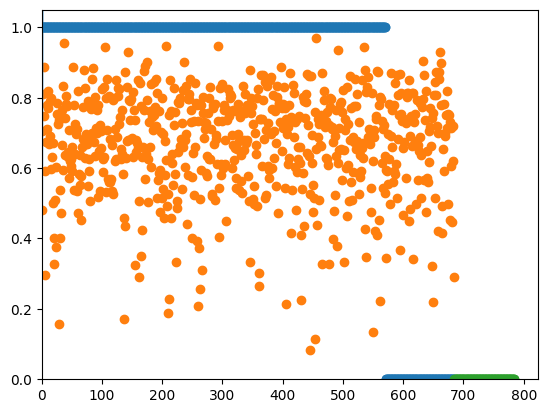

In [89]:
formatted_labels = 1 - np.minimum(labels, 1)
labels_pruned = formatted_labels[::500]
predictions_pruned = predictions[::500]
plt.scatter(range(len(labels_pruned)), labels_pruned)
plt.scatter(range(len(labels_pruned)), predictions_pruned)
plt.scatter(range(len(labels_pruned)+100, len(labels_pruned) + random_predictions.shape[0]+100), random_predictions)
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


In [85]:
loss = np.mean(np.square(predictions - formatted_labels))
loss

0.19006598